# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Set the units to metric, so they're easier to interpret
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | mossel bay
Processing Record 3 of Set 1 | prosser
Processing Record 4 of Set 1 | nemuro
Processing Record 5 of Set 1 | tura
Processing Record 6 of Set 1 | rongelap
Processing Record 7 of Set 1 | klyuchi
Processing Record 8 of Set 1 | kolondieba
Processing Record 9 of Set 1 | cidade velha
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | leiyang
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | tamanrasset
Processing Record 14 of Set 1 | nova sintra
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | varadero
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | otuzco
Processing Record 21 of Set 1 | maiduguri
Processing Record 22 of Set 1 | talnakh
Processing

Processing Record 38 of Set 4 | port elizabeth
Processing Record 39 of Set 4 | coahuayana de hidalgo
Processing Record 40 of Set 4 | shchuchyn
Processing Record 41 of Set 4 | woodward
Processing Record 42 of Set 4 | puerto rico
Processing Record 43 of Set 4 | queenstown
Processing Record 44 of Set 4 | yuzhno-kurilsk
Processing Record 45 of Set 4 | narvik
Processing Record 46 of Set 4 | severo-yeniseyskiy
Processing Record 47 of Set 4 | bamboo flat
Processing Record 48 of Set 4 | sitka
Processing Record 49 of Set 4 | dunay
Processing Record 0 of Set 5 | cabedelo
Processing Record 1 of Set 5 | portland
Processing Record 2 of Set 5 | cargados carajos
City not found. Skipping...
Processing Record 3 of Set 5 | marudi
City not found. Skipping...
Processing Record 4 of Set 5 | st. john's
Processing Record 5 of Set 5 | novyy urgal
Processing Record 6 of Set 5 | st. paul
Processing Record 7 of Set 5 | ilulissat
Processing Record 8 of Set 5 | enewetak
Processing Record 9 of Set 5 | khorol
Proces

Processing Record 29 of Set 8 | sorong
Processing Record 30 of Set 8 | mutoko
Processing Record 31 of Set 8 | natal
Processing Record 32 of Set 8 | suva
Processing Record 33 of Set 8 | bowen
Processing Record 34 of Set 8 | tilcara
Processing Record 35 of Set 8 | kievka
Processing Record 36 of Set 8 | elizabethtown
Processing Record 37 of Set 8 | ciudad bolivar
Processing Record 38 of Set 8 | touros
Processing Record 39 of Set 8 | stephenville
Processing Record 40 of Set 8 | coro
Processing Record 41 of Set 8 | mathis
Processing Record 42 of Set 8 | tidjikja
Processing Record 43 of Set 8 | lashio
Processing Record 44 of Set 8 | upata
Processing Record 45 of Set 8 | raduzhny
Processing Record 46 of Set 8 | argungu
Processing Record 47 of Set 8 | madalena
Processing Record 48 of Set 8 | balabac
Processing Record 49 of Set 8 | evanston
Processing Record 0 of Set 9 | prachuap khiri khan
Processing Record 1 of Set 9 | zaragoza
Processing Record 2 of Set 9 | udon thani
Processing Record 3 of 

Processing Record 21 of Set 12 | sola
Processing Record 22 of Set 12 | waingapu
Processing Record 23 of Set 12 | manismata
Processing Record 24 of Set 12 | nabire
Processing Record 25 of Set 12 | burang
Processing Record 26 of Set 12 | mezhdurechenskiy
Processing Record 27 of Set 12 | belmonte
Processing Record 28 of Set 12 | yigo village
Processing Record 29 of Set 12 | saint croix
Processing Record 30 of Set 12 | mugia
Processing Record 31 of Set 12 | roma
Processing Record 32 of Set 12 | wuchang
Processing Record 33 of Set 12 | ryotsu-minato
Processing Record 34 of Set 12 | beni
Processing Record 35 of Set 12 | daru
Processing Record 36 of Set 12 | arak
Processing Record 37 of Set 12 | bull savanna
Processing Record 38 of Set 12 | kapoeta
Processing Record 39 of Set 12 | faaa
Processing Record 40 of Set 12 | yermakovskoye
Processing Record 41 of Set 12 | port shepstone
Processing Record 42 of Set 12 | magadan
Processing Record 43 of Set 12 | tazacorte
Processing Record 44 of Set 12 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,5.09,52,40,1.54,CA,1712964862
1,mossel bay,-34.1831,22.1460,10.96,75,62,4.55,ZA,1712964888
2,prosser,46.2068,-119.7689,19.46,48,100,2.24,US,1712965103
3,nemuro,43.3236,145.5750,5.74,90,35,3.28,JP,1712964861
4,tura,25.5198,90.2201,23.71,36,24,0.75,IN,1712964866


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,5.09,52,40,1.54,CA,1712964862
1,mossel bay,-34.1831,22.1460,10.96,75,62,4.55,ZA,1712964888
2,prosser,46.2068,-119.7689,19.46,48,100,2.24,US,1712965103
3,nemuro,43.3236,145.5750,5.74,90,35,3.28,JP,1712964861
4,tura,25.5198,90.2201,23.71,36,24,0.75,IN,1712964866


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

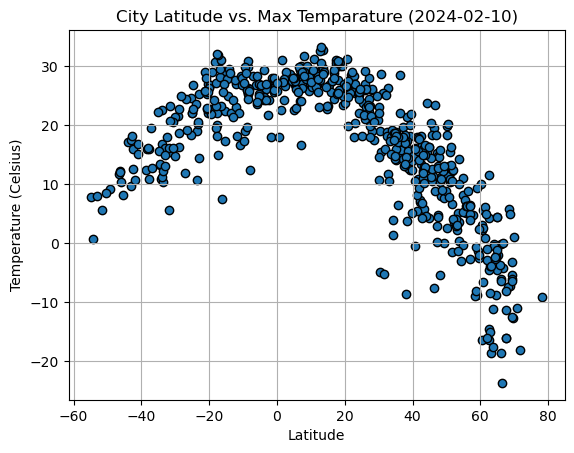

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temparature (2024-02-10)")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

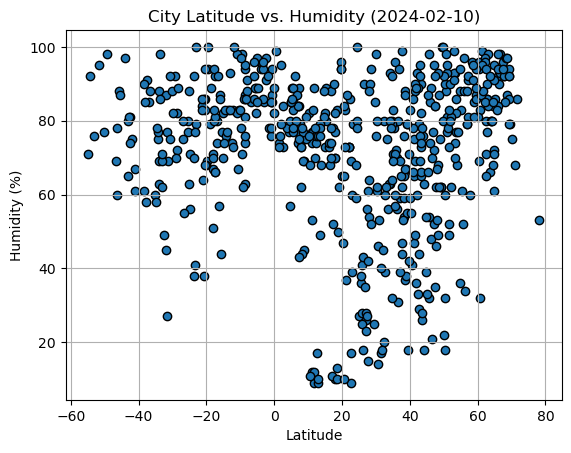

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-02-10)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

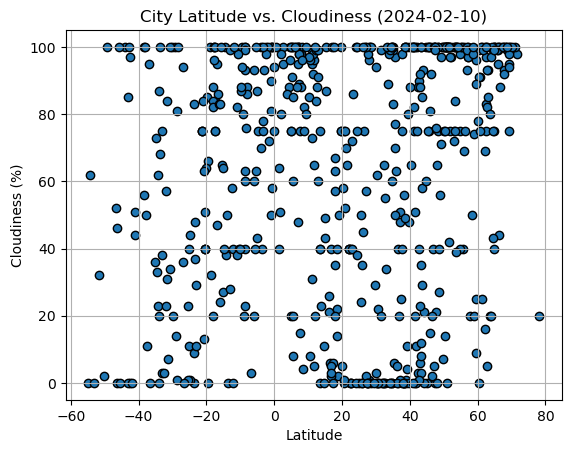

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-02-10)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

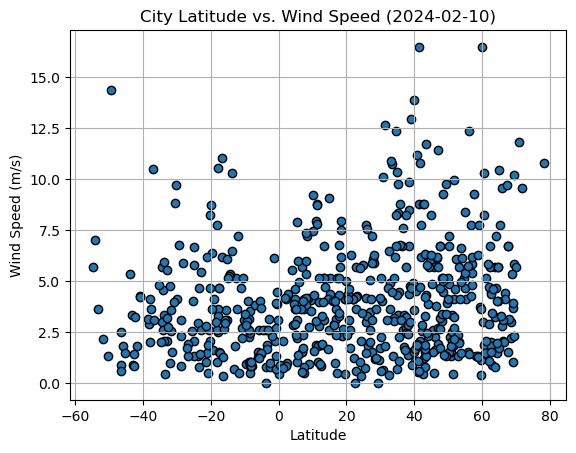

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-02-10)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,5.09,52,40,1.54,CA,1712964862
2,prosser,46.2068,-119.7689,19.46,48,100,2.24,US,1712965103
3,nemuro,43.3236,145.5750,5.74,90,35,3.28,JP,1712964861
4,tura,25.5198,90.2201,23.71,36,24,0.75,IN,1712964866
5,rongelap,11.1635,166.8941,27.01,74,95,7.94,MH,1712964874


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mossel bay,-34.1831,22.1460,10.96,75,62,4.55,ZA,1712964888
13,adamstown,-25.0660,-130.1015,22.12,63,11,6.65,PN,1712964859
14,invercargill,-46.4000,168.3500,12.23,78,46,0.89,NZ,1712964860
16,west island,-12.1568,96.8225,26.99,83,40,3.60,CC,1712964865
17,waitangi,-43.9535,-176.5597,17.12,97,100,5.36,NZ,1712964858


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.871945798396962


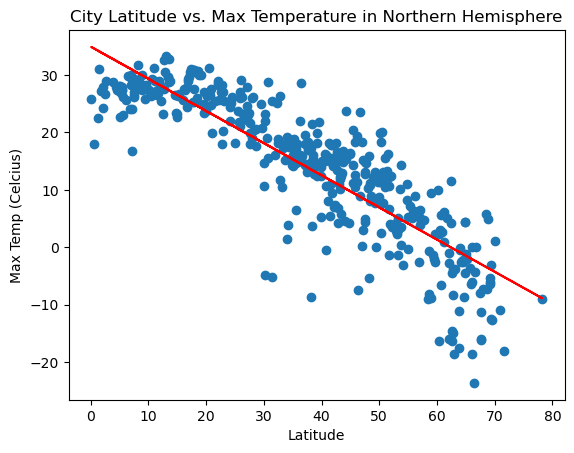

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Establish a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (5,-35), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (Celcius)")
plt.title("City Latitude vs. Max Temperature in Northern Hemisphere")
plt.show()

The r-value is: 0.7430040214653885


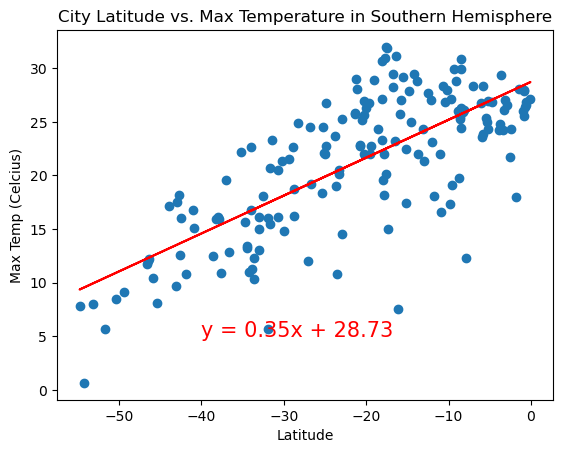

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Establish a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-40,5), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (Celcius)")
plt.title("City Latitude vs. Max Temperature in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**

Using the r-values here we can see that there is a strong negative correlation between a city's latitude and it's temperature for cities in the Northern Hempisphere and moderate positive correlation for cities in the Southern Hemisphere. This means that the data indicates that for the Northern Hemisphere the temperature should decrease as the latitude increases and that the opposite can be expected for the Southern Hemisphere. It seems that a more concise conclusion would be that the closer a city is to the equator you can expect a higher tempature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.21858883633001516


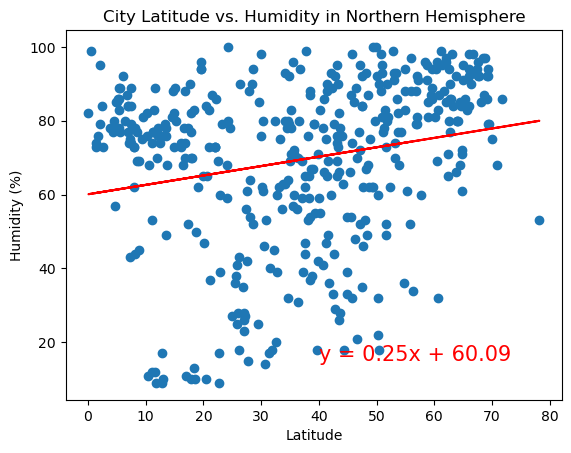

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Establish a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (40,15), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity in Northern Hemisphere")
plt.show()

The r-value is: 0.2564921885435396


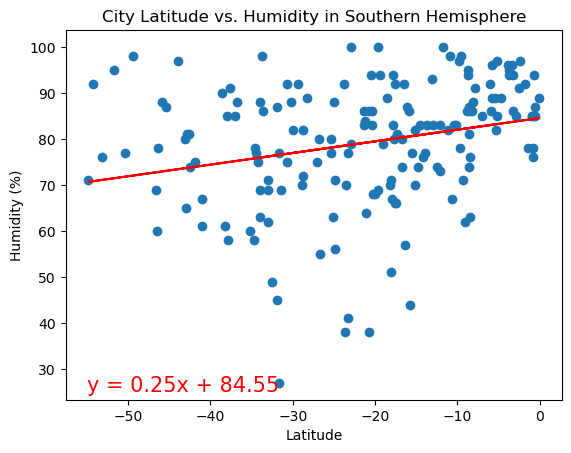

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Establish a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-55,25), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** 

Judginge by the r-values we can see that there is a moderate/strong positive correlation between a city's latitude and it's humidity in the Northern Hemisphere but that correlation is less strong for cities in the Southern Hemisphere. So you may expect higher humidity the higher in latitude you go for cities in the Nothern Hemisphere but less so with cities in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.15807766013933472


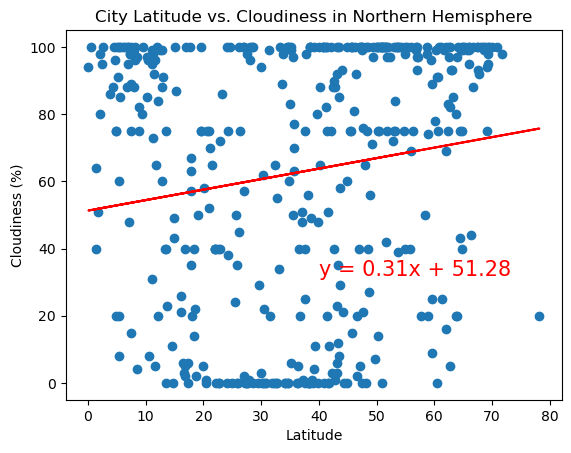

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Establish a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (40,32), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness in Northern Hemisphere")
plt.show()

The r-value is: 0.32583225621244905


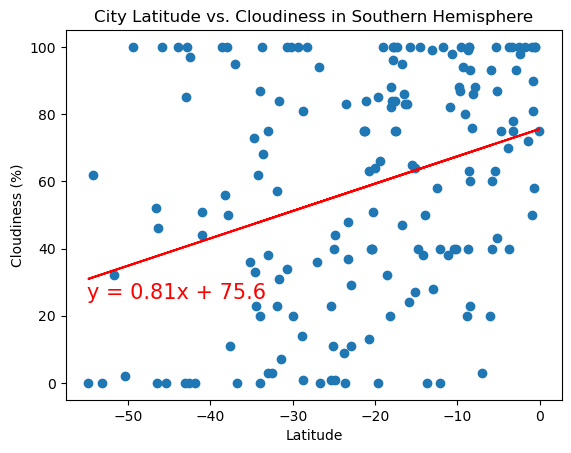

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Establish a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-55,25), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** 

These two graphs show a positive correlation between latitude and cloudiness but it is moderate/weak at best. Cloudiness does increase slightly as we move up in latitude but the data is widely dispersed.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1295227481468168


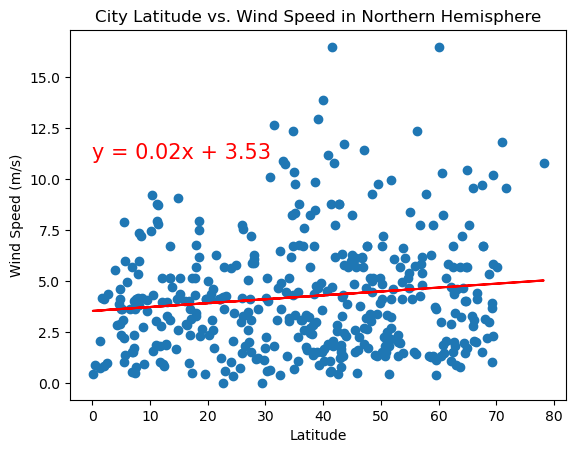

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Establish a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (0,11), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed in Northern Hemisphere")
plt.show()

The r-value is: -0.15641358309553474


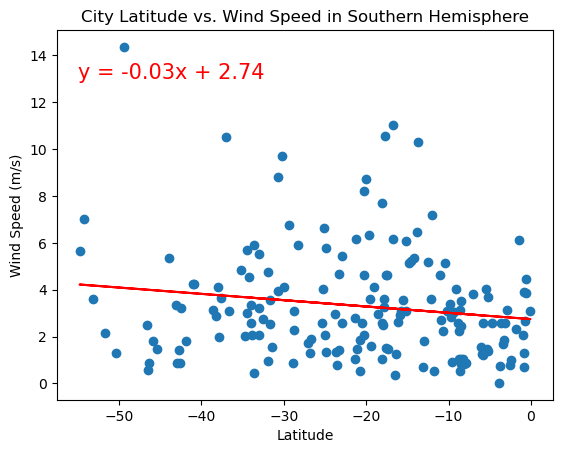

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Establish a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-55,13), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**

Based on the r-value being close to zero we can see that the relationship between the city's latitude and it's wind speed is weak at best. This is true for cities in both the Northern and Southern Hemispheres. This woudl show that a city's latitude is not useful data in determining that city's wind speed.